In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
prod = pd.read_csv("ml.csv", index_col = None,delimiter =";")

In [3]:
prod.dropna(inplace = True)

In [4]:
prod.head()

,_product_category_name_,_product_name_lenght_,_product_weight_g_,_product_length_cm_,_product_height_cm_,_product_width_cm_,_seller_city_,_seller_state_,_payment_type_,_payment_installments_,_payment_value_,_price_,_freight_value_
0,cool_stuff,58.0,650.0,28.0,9.0,14.0,volta redonda,SP,credit_card,2,72.19,58.90,13.29
1,pet_shop,56.0,30000.0,50.0,30.0,40.0,sao paulo,SP,credit_card,3,259.83,239.90,19.93
2,moveis_decoracao,59.0,3050.0,33.0,13.0,33.0,borda da mata,MG,credit_card,5,216.87,199.00,17.87
3,perfumaria,42.0,200.0,16.0,10.0,15.0,franca,SP,credit_card,2,25.78,12.99,12.79
4,ferramentas_jardim,59.0,3750.0,35.0,40.0,30.0,loanda,PR,credit_card,3,218.04,199.90,18.14


In [5]:
prod["_product_category_name_"].replace(['perfumaria', 'artes', 'bebes',
       'instrumentos_musicais', 'cool_stuff','utilidades_domesticas'
       'eletrodomesticos', 'brinquedos',
       'construcao_ferramentas_seguranca',
       'malas_acessorios',
       'ferramentas_jardim', 'moveis_escritorio', 'automotivo',
       'eletronicos', 'fashion_calcados', 'telefonia', 'papelaria',
       'fashion_bolsas_e_acessorios', 'pcs', 'casa_construcao',
       'relogios_presentes', 'construcao_ferramentas_construcao',
       'pet_shop', 'eletroportateis', 'agro_industria_e_comercio',
       'moveis_sala', 'sinalizacao_e_seguranca', 'climatizacao',
       'consoles_games', 'livros_interesse_geral',
       'construcao_ferramentas_ferramentas',
       'fashion_underwear_e_moda_praia', 'fashion_roupa_masculina',
       'moveis_cozinha_area_de_servico_jantar_e_jardim','eletrodomesticos',
       'industria_comercio_e_negocios', 'telefonia_fixa',
       'construcao_ferramentas_iluminacao', 'livros_tecnicos',
       'eletrodomesticos_2', 'artigos_de_festas', 'bebidas',
       'market_place', 'la_cuisine', 'construcao_ferramentas_jardim',
       'fashion_roupa_feminina', 'casa_conforto', 'audio',
       'alimentos_bebidas', 'musica', 'alimentos',
       'tablets_impressao_imagem', 'livros_importados',
       'portateis_casa_forno_e_cafe', 'fashion_esporte',
       'artigos_de_natal', 'fashion_roupa_infanto_juvenil',
       'dvds_blu_ray', 'artes_e_artesanato', 'pc_gamer', 'moveis_quarto',
       'cine_foto', 'fraldas_higiene', 'flores', 'casa_conforto_2',
       'portateis_cozinha_e_preparadores_de_alimentos',
       'seguros_e_servicos', 'moveis_colchao_e_estofado',
       'cds_dvds_musicais'], 'Others', inplace=True)

prod["_product_category_name_"].value_counts()

Others                    37103
cama_mesa_banho            7095
beleza_saude               6027
esporte_lazer              5482
moveis_decoracao           5255
informatica_acessorios     4973
utilidades_domesticas      4477
Name: _product_category_name_, dtype: int64

In [6]:
condition = prod['_product_category_name_'] == 'Others'
index_to_drop = prod[condition].index
prod.drop(index_to_drop, inplace=True)

In [7]:
prod["_product_category_name_"] = prod["_product_category_name_"].map({'cama_mesa_banho': 0, 'esporte_lazer': 1, 'moveis_decoracao': 2
                                                                  ,'beleza_saude': 3, 'utilidades_domesticas': 4, 'informatica_acessorios': 5})

In [8]:
y = prod._product_category_name_
y

2        2
5        4
8        3
10       3
12       0
        ..
71418    4
71419    5
71420    1
71421    5
71422    0
Name: _product_category_name_, Length: 33309, dtype: int64

In [9]:
col = [1,2,3,4,5,9,10,11,12]
x = prod.iloc[:,col]
x

,_product_name_lenght_,_product_weight_g_,_product_length_cm_,_product_height_cm_,_product_width_cm_,_payment_installments_,_payment_value_,_price_,_freight_value_
2,59.0,3050.0,33.0,13.0,33.0,5,216.87,199.00,17.87
5,36.0,450.0,24.0,8.0,15.0,1,34.59,21.90,12.69
8,59.0,2000.0,30.0,12.0,16.0,3,157.60,145.95,11.65
10,57.0,950.0,35.0,25.0,20.0,3,68.87,59.99,8.88
12,54.0,1383.0,50.0,10.0,40.0,4,97.32,74.00,23.32
...,...,...,...,...,...,...,...,...,...
71418,43.0,10150.0,89.0,15.0,40.0,1,343.40,299.99,43.41
71419,31.0,8950.0,45.0,26.0,38.0,1,386.53,350.00,36.53
71420,43.0,967.0,21.0,24.0,19.0,3,116.85,99.90,16.95
71421,56.0,100.0,20.0,20.0,20.0,3,64.71,55.99,8.72


In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)

In [11]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
x_train = scaler.fit_transform(x_train)

In [12]:
x_test = scaler.transform(x_test)

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
dt=DecisionTreeClassifier(random_state=0)

In [15]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [16]:
print('score de train=',dt.score(x_train,y_train))
print('score de test=',dt.score(x_test,y_test))

score de train= 1.0
score de test= 0.8480936655658962


In [17]:
#from imblearn.over_sampling import RandomOverSampler

# Define the RandomOverSampler object
#ros = RandomOverSampler(random_state=0)

# Fit the RandomOverSampler to the training data
#x_resampled, y_resampled = ros.fit_resample(x_train, y_train)

In [18]:
#y_resampled.value_counts()

C:\Users\chleg\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


ValueError: The number of FixedLocator locations (6), usually from a call to set_ticks, does not match the number of ticklabels (33309).

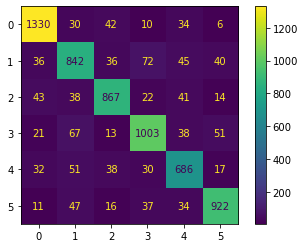

In [19]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dt, x_test, y_test,display_labels=y)  
plt.show()

In [20]:
from sklearn.metrics import classification_report
y_pred=dt.predict(x_test)
print(classification_report(y_test,y_pred,digits=6))

              precision    recall  f1-score   support

           0   0.902919  0.915978  0.909402      1452
           1   0.783256  0.786181  0.784716      1071
           2   0.856719  0.845854  0.851252      1025
           3   0.854344  0.840738  0.847486      1193
           4   0.781321  0.803279  0.792148       854
           5   0.878095  0.864105  0.871044      1067

    accuracy                       0.848094      6662
   macro avg   0.842776  0.842689  0.842675      6662
weighted avg   0.848312  0.848094  0.848148      6662



In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
param_grid={'criterion':['gini','entropy'],'max_depth':np.arange(1,10)}

In [23]:
grid = GridSearchCV(DecisionTreeClassifier(random_state=3),param_grid,cv=5)

In [24]:
grid.fit(x,y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=3),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [25]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 9}

In [26]:
grid.best_score_

0.6187519253268611

In [27]:
final_model=grid.best_estimator_

In [28]:
final_model

DecisionTreeClassifier(criterion='entropy', max_depth=9, random_state=3)

In [29]:
final_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, random_state=3)

In [30]:
final_model.score(x_train,y_train)

0.65129282846099

In [31]:
print(final_model.score(x_test,y_test))

0.6379465625938157


In [32]:
from sklearn.metrics import classification_report
y_pred=final_model.predict(x_test)
print(classification_report(y_test,y_pred,digits=6))

              precision    recall  f1-score   support

           0   0.649678  0.834022  0.730398      1452
           1   0.484108  0.554622  0.516971      1071
           2   0.726293  0.657561  0.690220      1025
           3   0.611024  0.650461  0.630126      1193
           4   0.660040  0.388759  0.489315       854
           5   0.762069  0.621368  0.684564      1067

    accuracy                       0.637947      6662
   macro avg   0.648869  0.617799  0.623599      6662
weighted avg   0.647255  0.637947  0.633704      6662

